Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StanModels
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path_s("..", "scripts", "08")
cd(ProjDir)

### snippet 8.25

In [3]:
N = 100                                                    # individuals
height  = rand(Normal(10,2), N) ;              # sim total height of each
leg_prop = rand(Uniform(0.4,0.5), N);      # leg as proportion of height

sim left leg as proportion + error

In [4]:
leg_left = leg_prop .* height .+  rand(Normal( 0 , 0.02 ), N);

sim right leg as proportion + error

In [5]:
leg_right = leg_prop .* height .+  rand(Normal( 0 , 0.02 ), N);

combine into data frame

In [6]:
df =  DataFrame(height=height, leg_left = leg_left, leg_right = leg_right);

Show first 5 rows

In [7]:
first(df, 5)

,height,leg_left,leg_right
,Float64,Float64,Float64
1,9.01051,4.38552,4.4178
2,9.76196,4.34406,4.30476
3,10.8272,5.12113,5.11762
4,11.2585,4.67642,4.67159
5,10.9184,4.39899,4.45925


Define the Stan language model

In [8]:
m_5_8 = "
data{
    int N;
    real height[N];
    real leg_right[N];
    real leg_left[N];
}
parameters{
    real a;
    real bl;
    real br;
    real sigma;
}
model{
    vector[N] mu;
    sigma ~ cauchy( 0 , 1 );
    br ~ normal( 2 , 10 );
    bl ~ normal( 2 , 10 );
    a ~ normal( 10 , 100 );
    for ( i in 1:100 ) {
        mu[i] = a + bl * leg_left[i] + br * leg_right[i];
    }
    height ~ normal( mu , sigma );
}
";

Define the Stanmodel and set the output format to :mcmcchains.

In [9]:
stanmodel = Stanmodel(name="m_5_8", monitors = ["a", "br", "bl", "sigma"],
  model=m_5_8, output_format=:mcmcchains);
# Input data for cmdstan
m_8_8_data = Dict("N" => size(df, 1), "height" => df[:height],
    "leg_left" => df[:leg_left], "leg_right" => df[:leg_right]);
# Sample using cmdstan
rc, chn, cnames = stan(stanmodel, m_8_8_data, ProjDir, diagnostics=false,
  summary=false, CmdStanDir=CMDSTAN_HOME);
# Describe the draws
describe(chn)


File /Users/rob/.julia/dev/StanModels/scripts/08/tmp/m_5_8.stan will be updated.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is -4728.31, but must be > 0!  (in '/Users/rob/.julia/dev/StanModels/scripts/08/tmp/m_5_8.stan' at line 22)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is -132.937, but must be > 0!  (in '/Users/rob/.julia/dev/StanModels/scripts/08/tmp/m_5_8.stan' at line 22)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning o

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 1 columns
│ Row │ parameters │ mean      │ std       │ naive_se    │ mcse        │
│     │ Symbol     │ Float64   │ Float64   │ Float64     │ Float64     │
├─────┼────────────┼───────────┼───────────┼─────────────┼─────────────┤
│ 1   │ a          │ 0.603228  │ 0.310878  │ 0.00491541  │ 0.00581426  │
│ 2   │ bl         │ -0.550121 │ 2.22189   │ 0.0351312   │ 0.0624063   │
│ 3   │ br         │ 2.6407    │ 2.22527   │ 0.0351845   │ 0.0626804   │
│ 4   │ sigma      │ 0.624362  │ 0.0461565 │ 0.000729798 │ 0.000954481 │

Quantiles

│ Row │ parameters │ 2.5%       │ 25.0%    │ 50.0%     │ 75.0%    │ 97.5%    │
│     │ Symbol     │ Float64    │ Float64  │ Float64   │ Float64  │ Float64  │
├─────┼────────────┼────────────┼──────────┼───────────┼──────────┼──────────┤
│ 1   │ a          │ -0.0185619 │ 0.397491 │ 0.603795  │ 0.810743 │ 1.21166  │
│ 2   │ bl         │ -4.98207   │ -2.01935 │ -0.561758 │ 0.935014 │ 3.74955

Plot the density of posterior draws

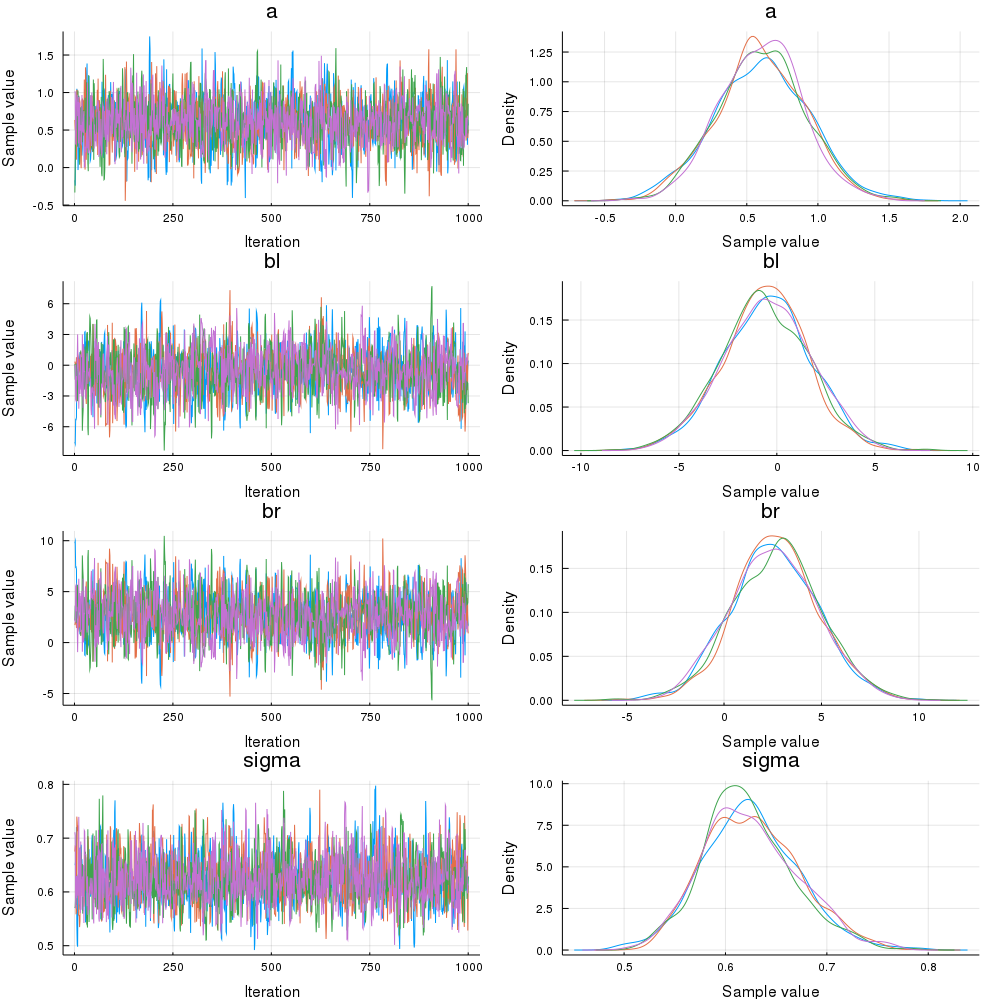

In [10]:
plot(chn)

Autocorrelation

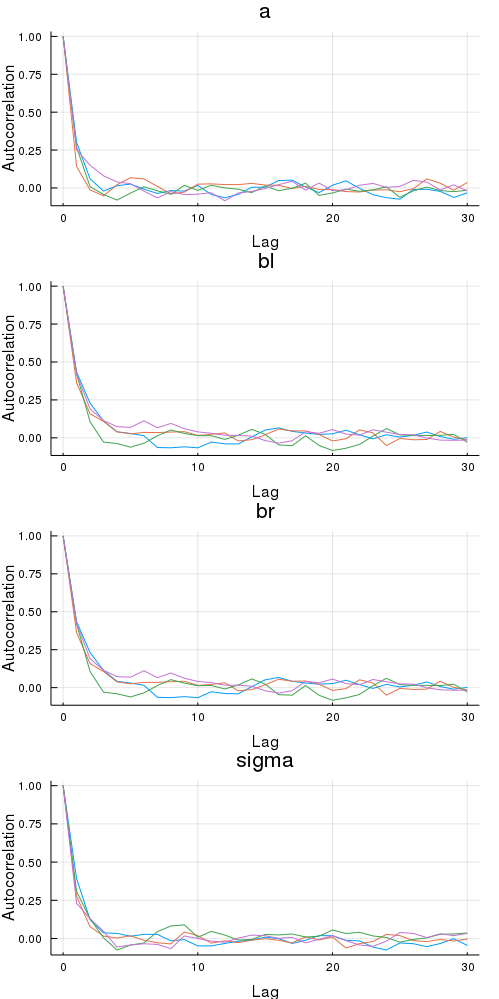

In [11]:
autocorplot(chn)

End of `08/m8.8s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*